In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy_financial as npf

# -----------------------------
# Read the Yield Curve CSV
# -----------------------------
df = pd.read_csv("Yield Curve.csv", parse_dates=["Date"])
df = df.sort_values(by="Date")  # ensure ascending date order

print("DataFrame Loaded. Shape:", df.shape)
print(df.head(8))


C:\Users\npwol\AppData\Local\Temp\ipykernel_47088\1174517473.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("Yield Curve.csv", parse_dates=["Date"])


DataFrame Loaded. Shape: (8757, 14)
           Date  1 Mo  2 Mo  3 Mo  4 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  \
8756 1990-01-02   NaN   NaN  7.83   NaN  7.89  7.81  7.87  7.90  7.87  7.98   
8755 1990-01-03   NaN   NaN  7.89   NaN  7.94  7.85  7.94  7.96  7.92  8.04   
8754 1990-01-04   NaN   NaN  7.84   NaN  7.90  7.82  7.92  7.93  7.91  8.02   
8753 1990-01-05   NaN   NaN  7.79   NaN  7.85  7.79  7.90  7.94  7.92  8.03   
8752 1990-01-08   NaN   NaN  7.79   NaN  7.88  7.81  7.90  7.95  7.92  8.05   
8751 1990-01-09   NaN   NaN  7.80   NaN  7.82  7.78  7.91  7.94  7.92  8.05   
8750 1990-01-10   NaN   NaN  7.75   NaN  7.78  7.77  7.91  7.95  7.92  8.00   
8749 1990-01-11   NaN   NaN  7.80   NaN  7.80  7.77  7.91  7.95  7.94  8.01   

      10 Yr  20 Yr  30 Yr  
8756   7.94    NaN   8.00  
8755   7.99    NaN   8.04  
8754   7.98    NaN   8.04  
8753   7.99    NaN   8.06  
8752   8.02    NaN   8.09  
8751   8.02    NaN   8.10  
8750   8.03    NaN   8.11  
8749   8.04    NaN   8.11  


In [53]:
df_2024 = df[(df["Date"] >= "2024-01-01") & (df["Date"] <= "2024-12-31")].copy()
df_2024.reset_index(drop=True, inplace=True)

print("Truncated Data for 2024. Shape:", df_2024.shape)
print(df_2024.tail(5))


Truncated Data for 2024. Shape: (250, 14)
          Date  1 Mo  2 Mo  3 Mo  4 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  \
245 2024-12-24  4.44  4.44  4.40  4.38  4.30  4.24  4.29  4.36  4.43  4.52   
246 2024-12-26  4.45  4.45  4.35  4.37  4.31  4.23  4.30  4.35  4.42  4.49   
247 2024-12-27  4.44  4.43  4.31  4.35  4.29  4.20  4.31  4.36  4.45  4.53   
248 2024-12-30  4.43  4.42  4.37  4.33  4.25  4.17  4.24  4.29  4.37  4.46   
249 2024-12-31  4.40  4.39  4.37  4.32  4.24  4.16  4.25  4.27  4.38  4.48   

     10 Yr  20 Yr  30 Yr  
245   4.59   4.84   4.76  
246   4.58   4.83   4.76  
247   4.62   4.89   4.82  
248   4.55   4.84   4.77  
249   4.58   4.86   4.78  


In [54]:
melted = df_2024.melt(
    id_vars="Date",
    var_name="Maturity",
    value_name="Yield"
).dropna(subset=["Yield"])  # in case some yields are NaN
melted.reset_index(drop=True, inplace=True)

print("Melted DF shape:", melted.shape)
print(melted.head(10))


Melted DF shape: (3250, 3)
        Date Maturity  Yield
0 2024-01-02     1 Mo   5.55
1 2024-01-03     1 Mo   5.54
2 2024-01-04     1 Mo   5.56
3 2024-01-05     1 Mo   5.54
4 2024-01-08     1 Mo   5.54
5 2024-01-09     1 Mo   5.53
6 2024-01-10     1 Mo   5.53
7 2024-01-11     1 Mo   5.54
8 2024-01-12     1 Mo   5.55
9 2024-01-16     1 Mo   5.54


In [55]:
def convert_maturity(maturity_label):
    """
    Converts a maturity label (e.g. '1 Mo', '2 Yr') into a float (years).
    """
    if isinstance(maturity_label, str):
        parts = maturity_label.strip().split()
        if len(parts) == 2:
            num_str, unit = parts
            try:
                num_val = int(num_str)  # '1' -> 1, '2' -> 2, etc.
                if "Mo" in unit:
                    return num_val / 12.0
                elif "Yr" in unit:
                    return float(num_val)
            except ValueError:
                pass
    return None

melted["Maturity (Years)"] = melted["Maturity"].apply(convert_maturity)


c:\Users\npwol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\npwol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


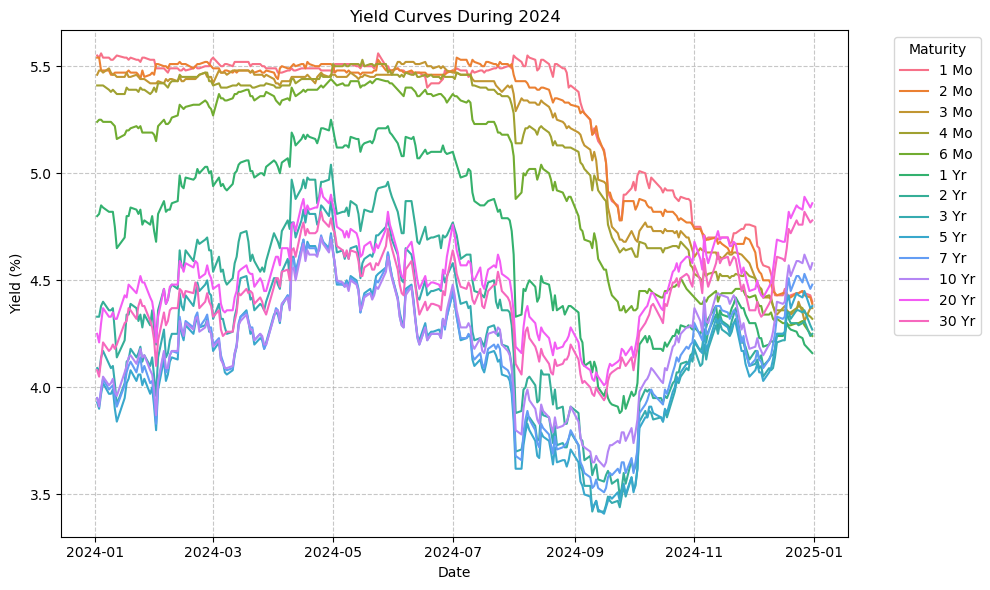

In [56]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted, x="Date", y="Yield", hue="Maturity")
plt.title("Yield Curves During 2024")
plt.xlabel("Date")
plt.ylabel("Yield (%)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Maturity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


c:\Users\npwol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\npwol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


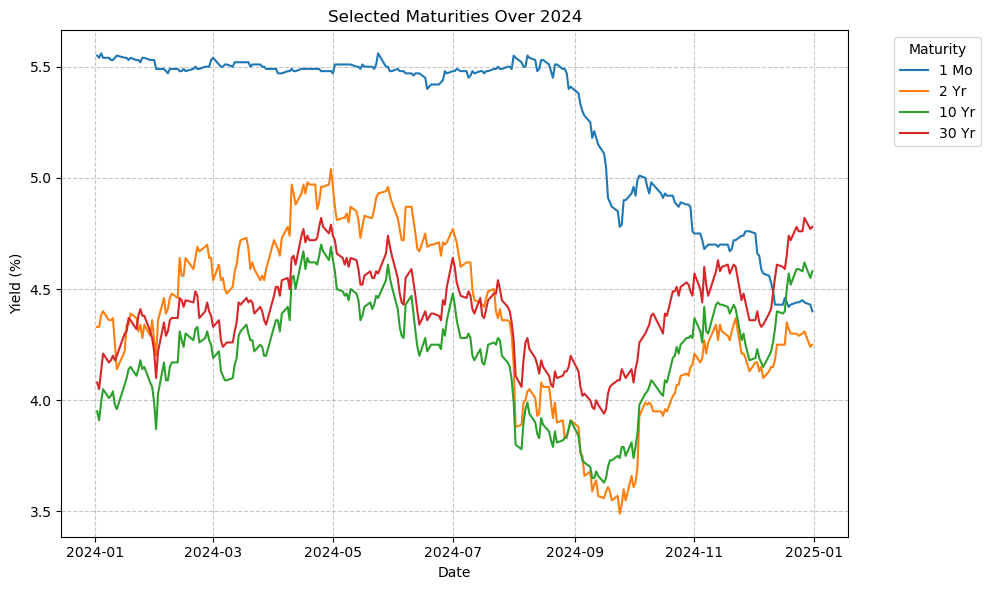

In [57]:
selected_maturities = ["1 Mo", "2 Yr", "10 Yr", "30 Yr"]
subset = melted[melted["Maturity"].isin(selected_maturities)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=subset, x="Date", y="Yield", hue="Maturity")
plt.title("Selected Maturities Over 2024")
plt.xlabel("Date")
plt.ylabel("Yield (%)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Maturity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [58]:
purchase_date = "2024-12-31"
selected_yield_curve = melted[melted["Date"] == purchase_date].copy()

if selected_yield_curve.empty:
    raise ValueError(f"No yield curve data found for {purchase_date}.")


In [59]:
def bond_price_from_yield(yield_percent, maturity_years, face_value=1000.0, coupon_rate_percent=None, compounding=2):
    """
    Computes the present value (price) of a bond given:
      - yield_percent: annual yield as a percentage (e.g. 4.25)
      - maturity_years: time to maturity in years
      - face_value: principal (default=1000)
      - coupon_rate_percent: if None, we assume the coupon = yield (par bond).
      - compounding: # of coupon payments per year (2 = semiannual, 1=annual, 4=quarterly, etc.)
    
    Returns: float (price)
    """
    y_decimal = yield_percent / 100.0
    if coupon_rate_percent is None:
        # By default, assume coupon rate = yield => par bond scenario
        coupon_rate_percent = yield_percent
    
    coupon_rate_decimal = coupon_rate_percent / 100.0
    
    # Periodic yield
    period_yield = y_decimal / compounding
    num_periods = int(round(maturity_years * compounding))
    # Ensure at least 1 period
    if num_periods < 1:
        num_periods = 1
    
    # Periodic coupon in $
    coupon_payment = (face_value * coupon_rate_decimal) / compounding
    
    # Discount each period's coupon
    price = 0.0
    for t in range(1, num_periods + 1):
        price += coupon_payment / ((1 + period_yield) ** t)
    
    # Add redemption of face value at final period
    price += face_value / ((1 + period_yield) ** num_periods)
    
    return price


In [60]:
def total_return_if_held_to_maturity(bond_price, face_value, annual_coupon_rate, maturity_years, compounding=2):
    """
    Computes the total (gross) return on a bond if bought at 'bond_price' and held to maturity,
    collecting coupons plus redemption of face_value.
    
    total_return = (Future Value of all flows - bond_price) / bond_price
    
    Then we annualize: 
       annualized_return = (1 + total_return)^(1 / maturity_years) - 1.
    """
    # Periodic coupon
    coupon = (face_value * annual_coupon_rate) / compounding
    num_periods = int(round(maturity_years * compounding))
    if num_periods < 1:
        num_periods = 1
    
    # Total future inflows:
    #   sum of all coupons + final redemption
    total_coupons = coupon * num_periods
    final_principal = face_value
    total_inflows = total_coupons + final_principal
    
    gross_return = (total_inflows - bond_price) / bond_price
    
    # Annualize it over 'maturity_years'
    annualized = (1.0 + gross_return) ** (1.0 / maturity_years) - 1.0
    
    return gross_return, annualized

# For 2 Yr and 10 Yr, let’s assume the coupon = yield => par bond style
bond_labels = ["2 Yr", "10 Yr"]
compounding_map = {"2 Yr": 2, "10 Yr": 2}  # example: semiannual coupons

results = []
for mat_label in bond_labels:
    row = selected_yield_curve[selected_yield_curve["Maturity"] == mat_label]
    if row.empty:
        print(f"No {mat_label} found for {purchase_date}. Skipping.")
        continue
    
    yld = row["Yield"].values[0]  # e.g., 4.25
    maturity_yrs = convert_maturity(mat_label)  # e.g., 2.0 or 10.0
    
    if pd.isna(maturity_yrs) or maturity_yrs <= 0:
        print(f"Invalid maturity for {mat_label}, skipping.")
        continue
    
    comp = compounding_map[mat_label]
    
    # 1) Compute the bond price from yield (par if coupon_rate=yield)
    price = bond_price_from_yield(yield_percent=yld, 
                                  maturity_years=maturity_yrs,
                                  face_value=1000,
                                  coupon_rate_percent=yld,  # par bond assumption
                                  compounding=comp)
    # 2) Compute the total return if held to maturity
    annual_coupon_rate = yld / 100.0  # decimal
    tr, ann = total_return_if_held_to_maturity(price, 1000, annual_coupon_rate, maturity_yrs, compounding=comp)
    
    results.append({
        "Bond": mat_label,
        "Purchase Date": purchase_date,
        "Quoted Yield (%)": yld,
        "Compounding": comp,
        "Price": price,
        "Gross Total Return (%)": 100 * tr,
        "Annualized Return (%)": 100 * ann
    })

# Display the results
results_df = pd.DataFrame(results)
print("\n=== Bond Analytics (Purchase at Quoted YTM) ===")
print(results_df)



=== Bond Analytics (Purchase at Quoted YTM) ===
    Bond Purchase Date  Quoted Yield (%)  Compounding   Price  \
0   2 Yr    2024-12-31              4.25            2  1000.0   
1  10 Yr    2024-12-31              4.58            2  1000.0   

   Gross Total Return (%)  Annualized Return (%)  
0                     8.5               4.163333  
1                    45.8               3.842648  


# Bond Risk Measures

- **(Macaulay) Duration**  
  Duration measures the weighted average time to receive cash flows and is an indicator of interest rate sensitivity.

- **Modified Duration**  
  Modified Duration adjusts Macaulay Duration for the current interest rate, offering a more direct measure of price sensitivity.

- **Convexity**  
  Convexity measures the curvature in the bond’s price–yield relationship, improving the accuracy of estimated price changes when yield shifts are large.


In [61]:
def compute_bond_duration_convexity(yield_percent, maturity_years, 
                                    face_value=1000, 
                                    coupon_rate_percent=None, 
                                    compounding=2):
    """
    Calculates Macaulay Duration, Modified Duration, and Convexity
    using standard discount factors for a coupon bond.
    """
    y_decimal = yield_percent / 100.0
    if coupon_rate_percent is None:
        coupon_rate_percent = yield_percent
    c_decimal = coupon_rate_percent / 100.0
    
    period_rate = y_decimal / compounding
    num_periods = int(round(maturity_years * compounding))
    if num_periods < 1:
        num_periods = 1

    # Periodic coupon in $
    coupon_payment = (face_value * c_decimal) / compounding

    # Present values of each coupon + final redemption
    pv_cashflows = []
    times = []  # in years (e.g., t = i/compounding)
    for i in range(1, num_periods + 1):
        t_years = i / compounding
        df = 1.0 / ((1.0 + period_rate) ** i)
        cflow = coupon_payment
        pv = cflow * df
        pv_cashflows.append(pv)
        times.append(t_years)
    # Add final redemption
    df = 1.0 / ((1.0 + period_rate) ** num_periods)
    pv_red = face_value * df
    pv_cashflows.append(pv_red)
    times.append(num_periods / compounding)

    # Bond Price
    bond_price = sum(pv_cashflows)

    # Macaulay Duration = sum(time * PV(CF)) / bond_price
    weighted_time_sum = 0.0
    for t_yrs, cf in zip(times, pv_cashflows):
        weighted_time_sum += t_yrs * cf
    macaulay_duration = weighted_time_sum / bond_price

    # Modified Duration
    modified_duration = macaulay_duration / (1.0 + period_rate)

    # Convexity (annual scaling approach)
    convex_sum = 0.0
    for i, pv_cf in enumerate(pv_cashflows, 1):
        t = i  # in "periods"
        convex_sum += t * (t + 1) * pv_cf
    convexity = convex_sum / (
        bond_price * ((1 + period_rate) ** 2) * (compounding ** 2)
    )

    return bond_price, macaulay_duration, modified_duration, convexity


In [62]:
print("\n=== Duration & Convexity on Purchase Date ===")
rows = []
for mat_label in bond_labels:
    row = selected_yield_curve[selected_yield_curve["Maturity"] == mat_label]
    if row.empty:
        continue
    yld = row["Yield"].values[0]
    maturity_yrs = convert_maturity(mat_label)
    comp = compounding_map[mat_label]

    price, mac_dur, mod_dur, conv = compute_bond_duration_convexity(
        yield_percent=yld, 
        maturity_years=maturity_yrs,
        face_value=1000.0,
        coupon_rate_percent=yld,   # par bond assumption
        compounding=comp
    )
    rows.append({
        "Bond": mat_label,
        "Yield (%)": yld,
        "Price": price,
        "Macaulay Duration": mac_dur,
        "Modified Duration": mod_dur,
        "Convexity": conv
    })

dc_df = pd.DataFrame(rows)
print(dc_df)



=== Duration & Convexity on Purchase Date ===
    Bond  Yield (%)   Price  Macaulay Duration  Modified Duration  Convexity
0   2 Yr       4.25  1000.0           1.938438           1.898103   6.801349
1  10 Yr       4.58  1000.0           8.133545           7.951457  82.169551


In [63]:
def binomial_tree_bond_price(face_value, coupon_rate, up_factor, down_factor,
                             risk_free_rate, periods, option_type=None):
    """
    Computes the bond price via a simple binomial model (no-arbitrage).
    option_type can be 'call', 'put', or None.
    
    risk_free_rate: per period (e.g., 4% if each step is 1 year).
    up_factor, down_factor: growth factors for the bond's underlying 'price' or 'rate'.
    periods: integer time steps.
    """
    # Risk-neutral prob
    p = (1 + risk_free_rate - down_factor) / (up_factor - down_factor)

    # Construct a 2D array [time step, node index]
    bond_values = np.zeros((periods + 1, periods + 1), dtype=float)

    # Terminal payoff at time T = face_value + last coupon
    final_coupon = face_value * coupon_rate
    for i in range(periods + 1):
        bond_values[periods, i] = face_value + final_coupon

    # Backward induction
    for t in range(periods - 1, -1, -1):
        for i in range(t + 1):
            # Up/Down next step
            up_val = bond_values[t + 1, i + 1]
            down_val = bond_values[t + 1, i]
            expected_value = (p * up_val + (1 - p) * down_val) / (1 + risk_free_rate)

            # Add coupon
            coupon_cf = face_value * coupon_rate
            node_value = coupon_cf + expected_value

            # If there's an embedded option
            if option_type == 'call':
                # Callable: issuer can redeem at face_value
                node_value = min(node_value, face_value)
            elif option_type == 'put':
                # Putable: holder can sell at face_value
                node_value = max(node_value, face_value)

            bond_values[t, i] = node_value

    # The bond value at the root node (t=0, i=0)
    return bond_values[0, 0]


In [64]:
def binomial_tree_bond_matrix(face_value, coupon_rate, up_factor, down_factor,
                              risk_free_rate, periods, option_type=None):
    """
    Returns a (node_index x time_step) matrix of bond prices for each node.
    We store node_index as rows and time_step as columns so that
    the heatmap can display time horizontally.
    """
    p = (1 + risk_free_rate - down_factor) / (up_factor - down_factor)
    
    # We'll build an internal 2D array shaped [t, i] = bond value
    # but we'll store it in a dictionary first, then invert for final output
    internal = np.zeros((periods+1, periods+1), dtype=float)

    final_coupon = face_value * coupon_rate
    # Terminal payoff
    for i in range(periods+1):
        internal[periods, i] = face_value + final_coupon

    # Backward induction
    for t in range(periods-1, -1, -1):
        for i in range(t+1):
            up_val = internal[t+1, i+1]
            down_val = internal[t+1, i]
            exp_val = (p * up_val + (1 - p) * down_val) / (1 + risk_free_rate)
            node_val = face_value * coupon_rate + exp_val

            if option_type == 'call':
                node_val = min(node_val, face_value)
            elif option_type == 'put':
                node_val = max(node_val, face_value)

            internal[t, i] = node_val

    # Now we want final shape = (rows = node_index, cols = time_step).
    # At time t, there are (t+1) possible nodes i=0..t.
    # We'll fill a new array with shape [max_nodes=periods+1, time_steps=periods+1].
    btree = np.full((periods+1, periods+1), np.nan)
    for t in range(periods+1):
        for i in range(t+1):
            btree[i, t] = internal[t, i]
    
    return btree



Binomial Bond Price (with a call option): 983.40

=== Bond Values at T=0,1,2 (All Path Nodes) ===

Time t=0:
  Node(i=0, t=0) = 983.40

Time t=1:
  Node(i=0, t=1) = 991.54
  Node(i=1, t=1) = 991.54

Time t=2:
  Node(i=0, t=2) = 1000.00
  Node(i=1, t=2) = 1000.00
  Node(i=2, t=2) = 1000.00


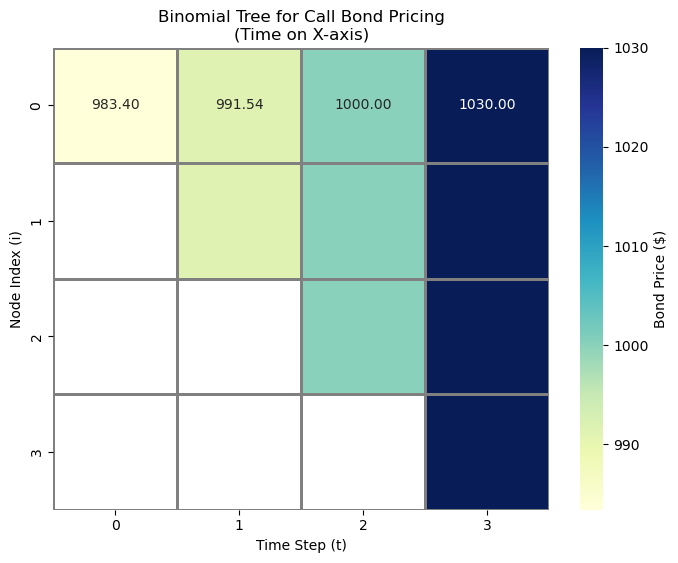

In [66]:
face_value = 1000.0
coupon_rate = 0.03      # 3% per period (toy example)
up_factor = 1.3
down_factor = 0.7
risk_free_periodic_rate = 0.04
periods = 3
option_type = "call"    # or "put" or None

# Price at the root node
bt_price = binomial_tree_bond_price(
    face_value, coupon_rate, up_factor, down_factor,
    risk_free_periodic_rate, periods, option_type
)
print(f"\nBinomial Bond Price (with a {option_type} option): {bt_price:.2f}")

# Full matrix for each node
tree_matrix = binomial_tree_bond_matrix(
    face_value, coupon_rate, up_factor, down_factor,
    risk_free_periodic_rate, periods, option_type
)

print("\n=== Bond Values at T=0,1,2 (All Path Nodes) ===")
max_t = min(2, periods)  # up to time=2 or the total periods if shorter
for t in range(max_t + 1):
    print(f"\nTime t={t}:")
    for i in range(t+1):
        val = tree_matrix[i, t]
        print(f"  Node(i={i}, t={t}) = {val:.2f}")

plt.figure(figsize=(8, 6))
ax = sns.heatmap(tree_matrix, annot=True, fmt=".2f", cmap="YlGnBu",
                 cbar_kws={'label': 'Bond Price ($)'}, 
                 linewidths=1, linecolor='gray')

plt.title(f"Binomial Tree for {option_type.capitalize()} Bond Pricing\n(Time on X-axis)")
plt.xlabel("Time Step (t)")
plt.ylabel("Node Index (i)")  # i= # of up moves
plt.show()